# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 5: Autoencoders 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

 `os.chdir()`: change the current working directory to specified path.

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

In [3]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


<div class="theme"> Overview </div> 


In this homework, we will investigate autoencoders, how they are related to PCA (and in doing so, show that they can be a more powerful extension of this technique), and one possible application of autoencoders for outlier detection.

<div class='exercise'><b> Question 1: Autoencoders and MNIST [50pts total] </b></div>

For this question, we will be using the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, a simple standardized image dataset. The dataset consists of single-channel (black and white) 28x28 images, containing one digit each. We will see if it is feasible to encode (compress, in this case) the images into just 2 dimensions, a substantial compression ratio considering that the original vector has dimension 28x28=784.

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes. 

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'. 

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?



## Answers

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.


In [4]:
# your code here
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalize between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0 

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.


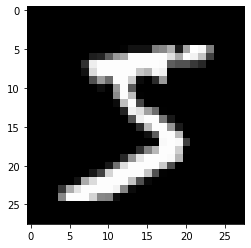

In [6]:
# your code here
plt.imshow(x_train[0,:,:], cmap = 'gray')
plt.show()

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.


In [7]:
# your code here
# flatten each image
x_train_flatten= x_train.reshape((x_train.shape[0], -1))
x_test_flatten= x_test.reshape((x_test.shape[0], -1))
# perform pca
pca = PCA(n_components=2).fit(x_train_flatten)
pca_latent_train = pca.transform(x_train_flatten)

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes.


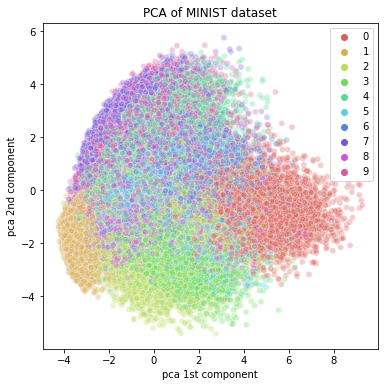

In [8]:
# your code here
plt.figure(figsize=(6,6))
sns.scatterplot(
    x= pca_latent_train[:,0], y= pca_latent_train[:,1],
    hue= y_train,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)
plt.xlabel('pca 1st component')
plt.ylabel('pca 2nd component')
plt.title('PCA of MINIST dataset')
plt.show()

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.


**layer and tensor in keras**:
[link](https://keras.io/getting-started/functional-api-guide/)
- A layer instance is callable (on a tensor), and it returns a tensor
- Input tensor(s) and output tensor(s) can then be used to define a Model
- Such a model can be trained just like Keras Sequential models.

`Model()` and `Sequential()`:

- Model(tensor, tensor)
- Sequential.add(layer)

**why the followign code is not working?**:

[Keras Model expects input & output arguments as layers, not tensors](https://stackoverflow.com/questions/57614513/typeerror-tensor-object-is-not-callable-keras-autoencoder)

```
input_dim = 28*28
encoding_dim = 2

input_features = Input(shape=(input_dim,)) # a tensor
hidden_layer = Dense(encoding_dim, activation='linear')(input_features) # layer(tensor) -> tensor
linear_encoder = Model(inputs = input_features, outputs = hidden_layer) # Model(tensor, tensor)

hidden_input = Input(shape=(encoding_dim,)) # a tensor
output_layer = Dense(input_dim, activation='linear')(hidden_layer) # a tensor
linear_decoder = Model(inputs = hidden_input, outputs = output_layer(hidden_input)) # Model(tensor, tensor(tensor)) -> error
```

** corrected code **:

```
input_img = tf.keras.layers.Input(shape=(16, 16, 256), name ="input")
encoded   = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded   = tf.keras.layers.Dense(256, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(input_img, decoded)
encoder     = tf.keras.Model(input_img, encoded)

encoded_input = tf.keras.layers.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1] # gets 'decoded' = last layer of 'autoencoder'

decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))
```

In [9]:
# your code here
input_dim = x_train_flatten.shape[1]
encoding_dim = 2
# encoder and decoder
input_layer = Input(shape=(input_dim,), name = 'input_layer')
encoded = Dense(encoding_dim, activation='linear', use_bias=False, name = 'latent_layer')(input_layer)
linear_encoder = Model(input_layer, encoded, name='linear_encoder' )
linear_encoder.summary()

latent_input = Input(shape=(encoding_dim,), name = 'latent_input')
decoded = Dense(input_dim, activation='linear', use_bias=False, name = 'output_layer')(latent_input)
linear_decoder = Model(latent_input, decoded, name='linear_decoder')
print('\n')
linear_decoder.summary()

# autoencoder
print('\n')
lae = Sequential(name = 'lae')
lae.add(linear_encoder)
lae.add(linear_decoder)
lae.summary()

Model: "linear_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
latent_layer (Dense)         (None, 2)                 1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


Model: "linear_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
latent_input (InputLayer)    [(None, 2)]               0         
_________________________________________________________________
output_layer (Dense)         (None, 784)               1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


Model: "lae"
_______

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.


In [10]:
# your code here
# compile
optimizer = Adam(lr=0.001)
lae.compile(optimizer=optimizer, loss='mse')
# train
epochs, batch_size = 6, 64
history = lae.fit(x_train_flatten, x_train_flatten,
                  epochs=epochs, 
                  batch_size=batch_size, 
                  validation_data=(x_test_flatten, x_test_flatten),
                 )
path_model = os.path.join(working_dir, 'model', 'lae.h5')
lae.save(path_model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0619 - val_loss: 0.0578
Epoch 2/6
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0579 - val_loss: 0.0578
Epoch 3/6
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0579 - val_loss: 0.0578
Epoch 4/6
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0579 - val_loss: 0.0578
Epoch 5/6
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0579 - val_loss: 0.0578
Epoch 6/6
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0579 - val_loss: 0.0578


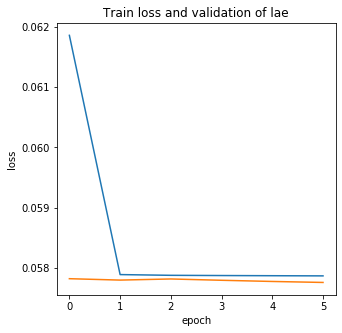

In [11]:
# your code here
plt.figure(figsize = (5,5))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title('Train loss and validation of lae')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.


**get layer name in keras**:

the name should be the same inside your model. to show this you could do the following.
```
print([layer.name for layer in model.get_layer('vgg16').layers])
```

In [12]:
print(lae.layers[0]) # each layer is a model
print(lae.layers[0].layers) # layers of linear_encoder
print([layer.name for layer in lae.layers]) # layer name of autoencoder
print([layer.name for layer in lae.get_layer('linear_encoder').layers]) # layer names of encoder

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9cfdf98750>, <tensorflow.python.keras.layers.core.Dense object at 0x7f9cfdf98e50>]
['linear_encoder', 'linear_decoder']
['input_layer', 'latent_layer']


**1st way**: get a new model up to latent layer, and then predict

model output same as last layer's output

In [13]:
print(lae.get_layer('linear_encoder').output)
print(lae.get_layer('linear_encoder').get_layer('latent_layer').output)
# first way
m = Model(inputs=[lae.get_layer('linear_encoder').input], 
          outputs=[lae.get_layer('linear_encoder').output])
# latent space representation of x_train
lae_latent_train = m.predict(x_train_flatten)

Tensor("latent_layer/Identity:0", shape=(None, 2), dtype=float32)
Tensor("latent_layer/Identity:0", shape=(None, 2), dtype=float32)


**2nd way**: since lae is built on two models (lae = Sequential(linear_encoder, linear_decoder), we could directly use linear_encoder model to predict on x_train

weights are the same for lae layer 0 and linear_encoder model

In [14]:
print(lae.get_weights()[0]) # weights of the first layer (linear_encoder)
print(linear_encoder.get_weights()) # weights of the linear_encoder

[[ 0.03476205 -0.08172915]
 [-0.01324228  0.02282277]
 [-0.04966358 -0.01256558]
 ...
 [ 0.08459858 -0.08236597]
 [ 0.0662412  -0.00152521]
 [ 0.01401266  0.01001879]]
[array([[ 0.03476205, -0.08172915],
       [-0.01324228,  0.02282277],
       [-0.04966358, -0.01256558],
       ...,
       [ 0.08459858, -0.08236597],
       [ 0.0662412 , -0.00152521],
       [ 0.01401266,  0.01001879]], dtype=float32)]


In [15]:
# your code here
# latent space representation of x_train
lae_latent_train = linear_encoder.predict(x_train_flatten)

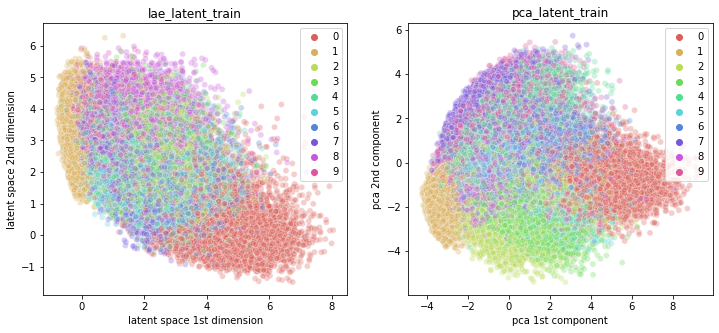

In [16]:
# your code here
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(
    x= lae_latent_train[:,0], y= lae_latent_train[:,1],
    hue= y_train,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3,
    ax = ax[0]
)
ax[0].set_xlabel('latent space 1st dimension')
ax[0].set_ylabel('latent space 2nd dimension')
ax[0].set_title('lae_latent_train')

sns.scatterplot(
    x= pca_latent_train[:,0], y= pca_latent_train[:,1],
    hue= y_train,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3,
    ax = ax[1]
)
ax[1].set_xlabel('pca 1st component')
ax[1].set_ylabel('pca 2nd component')
ax[1].set_title('pca_latent_train')
plt.show()

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*


*Your answer here*

There is a lot of overlapping between 10 lcasses of the latent space representations in PCA and the LAE, except clusters of 0 and 1. Neither one is substantially better than the other. Since we use only linear activation function for each dense layer, LAE and PCA are both linear transformation of the original space. Thus, they should have comparable performance.

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?


*Your answer here*

The reconstruction error will not change if we added more dense layers with only linear activations, as the output is still a linear transformation of the input.

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.


In [17]:
# your code here
# encoder and decoder
input_layer = Input(shape=(input_dim,), name = 'input_layer1')
encoding_dim1 = 256
encoding_dim2 = 64
encoding_dim3 = 2
encoded = Dense(encoding_dim1, activation='relu', use_bias=True, name = 'dense1')(input_layer)
encoded = Dense(encoding_dim2, activation='relu', use_bias=True, name = 'latent_layer2')(encoded)
encoded = Dense(encoding_dim3, activation='relu', use_bias=True, name = 'latent_layer3')(encoded)
encoder = Model(input_layer, encoded, name='encoder' )
encoder.summary()

latent_input = Input(shape=(encoding_dim3,), name = 'latent_input1')
decoded = Dense(encoding_dim2, activation='relu', use_bias=True, name = 'dense4')(latent_input)
decoded = Dense(encoding_dim1, activation='relu', use_bias=True, name = 'output_layer5')(decoded)
decoded = Dense(input_dim, activation='relu', use_bias=True, name = 'output_layer6')(decoded)
decoder = Model(latent_input, decoded, name='decoder')
print('\n')
decoder.summary()

# autoencoder
print('\n')
ae = Sequential(name = 'ae')
ae.add(encoder)
ae.add(decoder)
ae.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer1 (InputLayer)    [(None, 784)]             0         
_________________________________________________________________
dense1 (Dense)               (None, 256)               200960    
_________________________________________________________________
latent_layer2 (Dense)        (None, 64)                16448     
_________________________________________________________________
latent_layer3 (Dense)        (None, 2)                 130       
Total params: 217,538
Trainable params: 217,538
Non-trainable params: 0
_________________________________________________________________


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
latent_input1 (InputLayer)   [(None, 2)]               0         
__________________________________

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.


In [18]:
# your code here
# compile
optimizer = Adam(lr=0.002)
ae.compile(optimizer=optimizer, loss='mse')
# train
epochs, batch_size = 15, 64
history = ae.fit(x_train_flatten, x_train_flatten,
                  epochs=epochs, 
                  batch_size=batch_size, 
                  validation_data=(x_test_flatten, x_test_flatten),
                 )
path_model = os.path.join(working_dir, 'model', 'ae.h5')
ae.save(path_model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0557 - val_loss: 0.0484
Epoch 2/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0464 - val_loss: 0.0446
Epoch 3/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0443 - val_loss: 0.0439
Epoch 4/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0428 - val_loss: 0.0422
Epoch 5/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0416 - val_loss: 0.0413
Epoch 6/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0412 - val_loss: 0.0410
Epoch 7/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0404 - val_loss: 0.0403
Epoch 8/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0401 - val_loss: 0.0398
Epoch 9/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0396 - val_

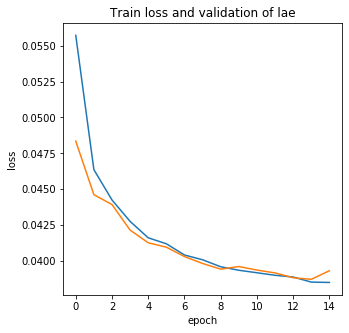

In [19]:
# your code here
plt.figure(figsize = (5,5))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title('Train loss and validation of lae')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?


In [20]:
# your code here
ae_latent_train = encoder.predict(x_train_flatten)

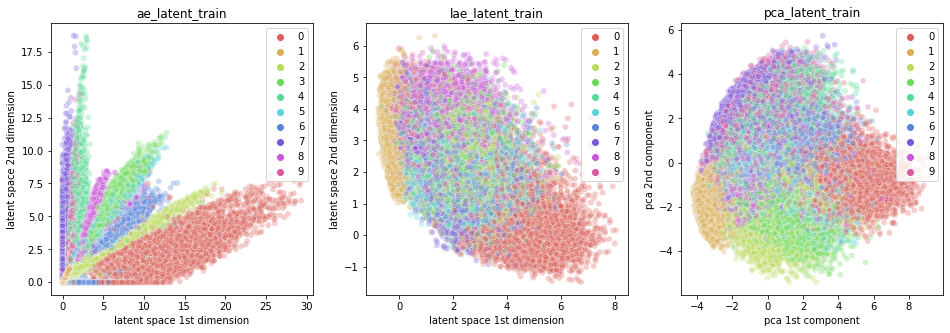

In [21]:
# your code here
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.scatterplot(
    x= ae_latent_train[:,0], y= ae_latent_train[:,1],
    hue= y_train,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3,
    ax = ax[0]
)
ax[0].set_xlabel('latent space 1st dimension')
ax[0].set_ylabel('latent space 2nd dimension')
ax[0].set_title('ae_latent_train')

sns.scatterplot(
    x= lae_latent_train[:,0], y= lae_latent_train[:,1],
    hue= y_train,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3,
    ax = ax[1]
)
ax[1].set_xlabel('latent space 1st dimension')
ax[1].set_ylabel('latent space 2nd dimension')
ax[1].set_title('lae_latent_train')

sns.scatterplot(
    x= pca_latent_train[:,0], y= pca_latent_train[:,1],
    hue= y_train,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3,
    ax = ax[2]
)
ax[2].set_xlabel('pca 1st component')
ax[2].set_ylabel('pca 2nd component')
ax[2].set_title('pca_latent_train')
plt.show()

*Your answer here*

AE do a substantially better job at separating the 10 classes in the 2D latent space than PCA and LAE. AE uses nonlinear transformation, so that our output is less restricted than using linear transformations.

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'.


**pca reconstruction**: [pca](https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com)

$X_{raw}$: n(10000) * p(784), $X$ centered data matrix: n(10000) * p(784)

$V$ matrix of k eigenvectors: p (784) * k (2)

$Z = XV$, $X = ZV^{T}$

In python, `pca.components_` is $V^{T}$

first way to invert: np.dot
```
# pca tranformation of x_test
pca_latent_test = pca.transform(x_test_flatten) # (n, k), (10000, 2)
# pca.components_ (2, 784)
# pca revert
pca_recons_x_test = np.dot(pca_latent_test, pca.components_) # (10000, 784)
```

second way to invert: pca.invert_transform()

In [22]:
# your code here
# pca tranformation of x_test
pca_latent_test = pca.transform(x_test_flatten) # (n, k), (10000, 2)
# pca invert
pca_recons_x_test = pca.inverse_transform(pca_latent_test)

# lae reconstructed images
lae_recons_x_test = lae.predict(x_test_flatten)
# ae reconstructed images
ae_recons_x_test = ae.predict(x_test_flatten)

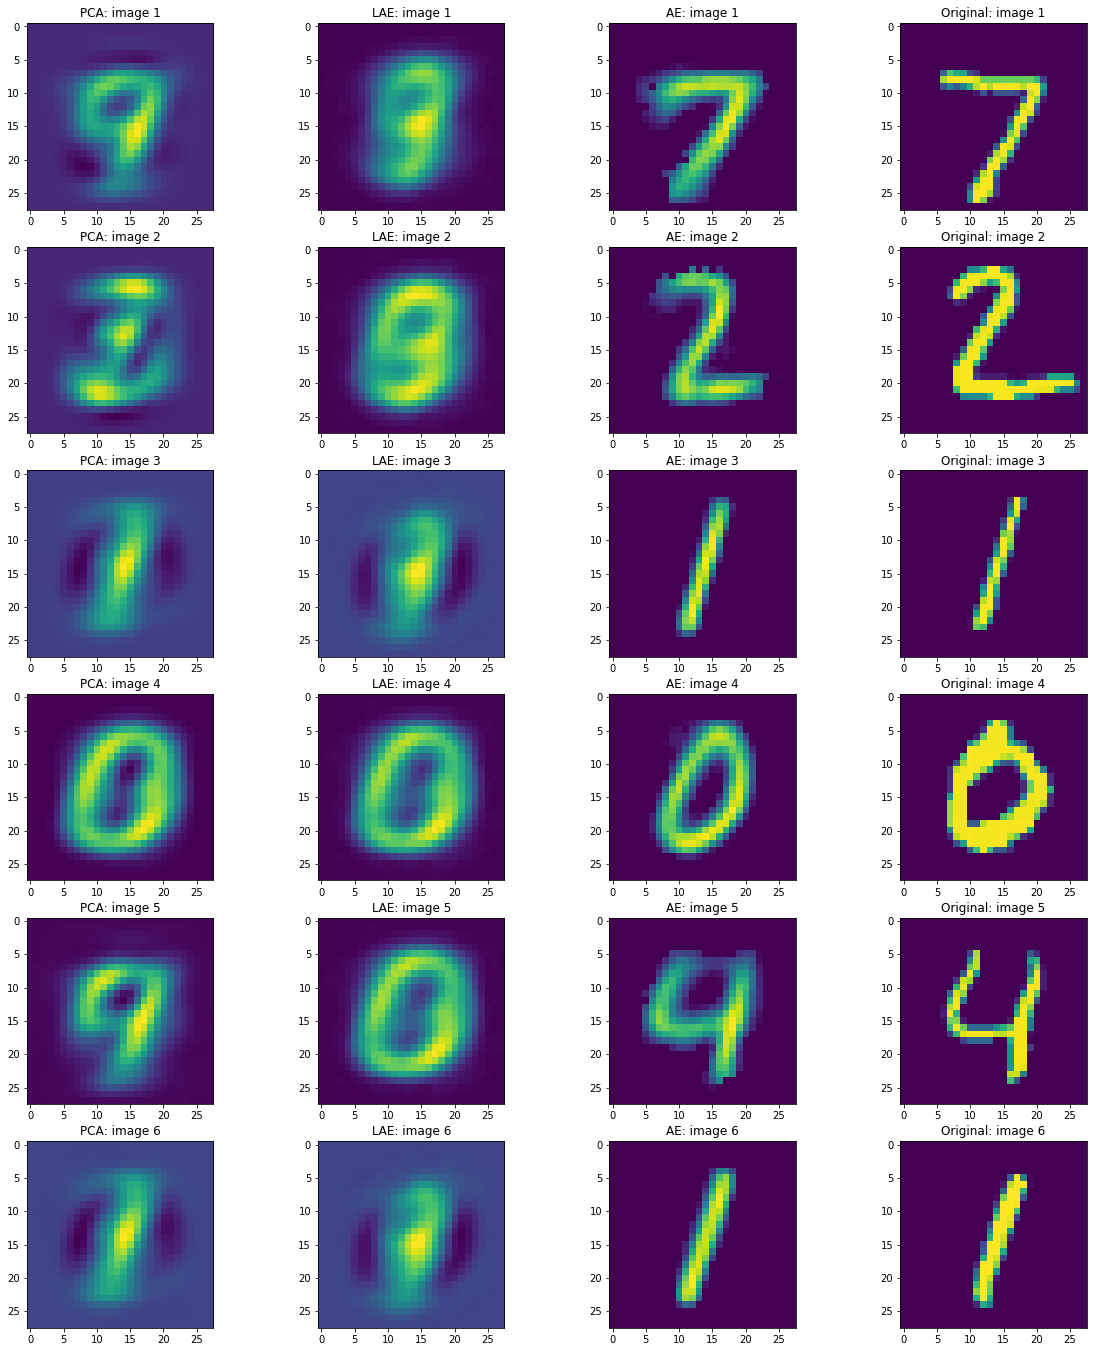

In [23]:
# your code here
fig, ax = plt.subplots(6,4, figsize = (20, 24))
for i in range(6):
    ax[i, 0].imshow(pca_recons_x_test[i, :].reshape((28,28)))
    ax[i, 0].set_title('PCA: image {}'.format(i + 1))
    ax[i, 1].imshow(lae_recons_x_test[i, :].reshape((28,28)))
    ax[i, 1].set_title('LAE: image {}'.format(i + 1))
    ax[i, 2].imshow(ae_recons_x_test[i, :].reshape((28,28)))
    ax[i, 2].set_title('AE: image {}'.format(i + 1))
    ax[i, 3].imshow(x_test[i, :, :])
    ax[i, 3].set_title('Original: image {}'.format(i + 1))

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?


In [24]:
# your code here
test_y_true = x_test_flatten
# pca
print('test mse for PCA: {:.3f}'.format(mean_squared_error(test_y_true, pca_recons_x_test)))
# LAE
print('test mse for LAE: {:.3f}'.format(mean_squared_error(test_y_true, lae_recons_x_test)))
# AE
print('test mse for AE: {:.3f}'.format(mean_squared_error(test_y_true, ae_recons_x_test)))

test mse for PCA: 0.056
test mse for LAE: 0.058
test mse for AE: 0.039


*Your answer here*

The best one is AE, then PCA, and lastly LAE. It agrees with what I've seen in the previous question, as LAE provides the best separation of latent space and better reconstructed images. 

It supports my conclution in 1,8. MSE for LAE and PCA are almost equal.

<div class='exercise'><b> Question 2: Convolutional Autoencoders and Outlier Detection [50pts total] </b></div>

For this question, we will be using a modified version of a subset of MNIST. We have hidden some images of handwritten letters in the dataset `data/cs109b-mnist-mix.csv` amongst thousands of handwritten digits. The dataset is provided as a csv, where each row is an image, and each column gives the value of a given pixel in a flattened 28 by 28 image. It would be very tedious to have humans flip through every image to find the letters, so instead we will exploit a neat feature of autoencoders, outlier detection. This method turns a disadvantage of autoencoders, namely, their inability to properly reconstruct data very dissimilar to what they were trained on, into an advantage. 

You will also be constructing a convolutional autoencoder, which tends to work a lot better for reconstructing images, all while using substantially fewer parameters.

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.


## Answers

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.


In [10]:
# your code here
data_path = os.path.join(working_dir, 'data', 'cs109b-mnist-mix.csv')
# read data and normalize it
x_raw = np.genfromtxt(data_path, delimiter=',') / 255.0
x_cs109b = x_raw.reshape((-1, 28,28))

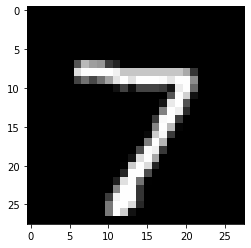

In [26]:
# your code here
plt.imshow(x_cs109b[0], cmap = 'gray')
plt.show()

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.


In [58]:
# your code here
input_shape = (x_train.shape[1], x_train.shape[1], 1)

cae = Sequential()
cae.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
cae.add(MaxPooling2D((2, 2), padding='same'))
cae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cae.add(MaxPooling2D((2, 2), padding='same'))
cae.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cae.add(MaxPooling2D((2, 2), padding='same'))
cae.add(Flatten())
cae.add(Dense(128, activation = 'relu'))
cae.add(Dense(64, activation = 'relu')) 
cae.add(Reshape((4,4,4))) 
cae.add(Conv2D(16, (3, 3), activation='relu', padding='same')) 
cae.add(UpSampling2D((2, 2)))
cae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))    
cae.add(UpSampling2D((2, 2)))
cae.add(Conv2D(64, (3, 3), activation='relu'))
cae.add(UpSampling2D((2, 2)))
cae.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

cae.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)             

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.


In [59]:
# your code here
# compile
optimizer = Adam(lr=0.0025)
cae.compile(optimizer=optimizer, loss='mse')
# train
epochs, batch_size = 20, 64
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

cae_history = cae.fit(x_train, x_train,
                  epochs=epochs, 
                  batch_size=batch_size, 
                  validation_data=(x_test, x_test)
                 )
path_model = os.path.join(working_dir, 'model', 'cae.h5')
cae.save(path_model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 225us/sample - loss: 0.0330 - val_loss: 0.0239
Epoch 2/20
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0228 - val_loss: 0.0226
Epoch 3/20
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0210 - val_loss: 0.0201
Epoch 4/20
60000/60000 [==============================] - 12s 202us/sample - loss: 0.0200 - val_loss: 0.0197
Epoch 5/20
60000/60000 [==============================] - 12s 202us/sample - loss: 0.0193 - val_loss: 0.0190
Epoch 6/20
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0189 - val_loss: 0.0190
Epoch 7/20
60000/60000 [==============================] - 12s 202us/sample - loss: 0.0185 - val_loss: 0.0183
Epoch 8/20
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0183 - val_loss: 0.0186
Epoch 9/20
60000/60000 [==============================] - 12s 202us/sample - l

In [72]:
path_model = os.path.join(working_dir, 'model', 'cae.h5')
cae.save(path_model)

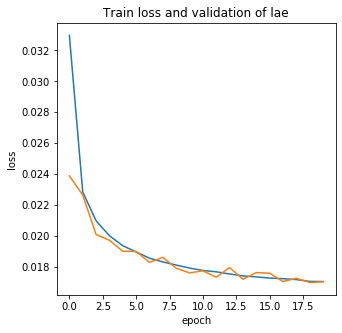

In [60]:
# your code here
plt.figure(figsize = (5,5))
plt.plot(cae_history.history['loss'], label = 'train')
plt.plot(cae_history.history['val_loss'], label = 'validation')
plt.title('Train loss and validation of lae')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?


In [61]:
# your code here
cae_recons_x_test = cae.predict(x_test)

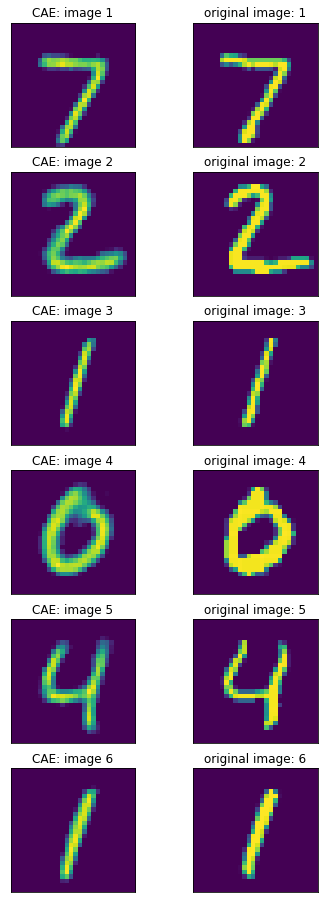

In [62]:
# your code here
fig, ax = plt.subplots(6,2, figsize = (6, 16))
for i in range(6):
    ax[i, 1].imshow(x_test[i,:,:,:].reshape(28,28))
    ax[i, 1].set_title('original image: {}'.format(i + 1))
    ax[i, 1].set_xticks([], [])
    ax[i, 1].set_yticks([], [])
    ax[i, 0].imshow(cae_recons_x_test[i, :, :, :].reshape((28,28)))
    ax[i, 0].set_title('CAE: image {}'.format(i + 1))
    ax[i, 0].set_xticks([], [])
    ax[i, 0].set_yticks([], [])

*Your answer here*

The reconstruction is much better than the dense autoencoder in 1.13, as the edge of digits are as clear as the original image.

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.


In [63]:
# your code here
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
mse_x_test = mse(x_test_flatten, cae_recons_x_test.reshape(cae_recons_x_test.shape[0], -1))

In [64]:
# your code here
cae_recons_x_cs109b = cae.predict(x_cs109b.reshape(x_cs109b.shape[0], x_cs109b.shape[1], x_cs109b.shape[2], 1))
mse_x_cs109b = mse(x_cs109b.reshape(x_cs109b.shape[0], -1), cae_recons_x_cs109b.reshape(cae_recons_x_cs109b.shape[0],-1))

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.


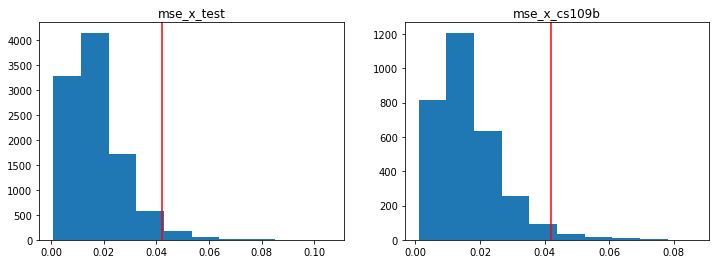

In [65]:
# your code here
# threshold
u = np.quantile(mse_x_cs109b.numpy(), 0.975)
# plot
fig, ax = plt.subplots(1,2, figsize = (12, 4))
ax[0].hist(mse_x_test)
ax[0].set_title('mse_x_test')
ax[0].axvline(u, 0, 3500, label = 'threshold', c = 'red')
ax[1].hist(mse_x_cs109b)
ax[1].set_title('mse_x_cs109b')
ax[1].axvline(u, 0, 3500, label = 'threshold', c = 'red')
plt.show()

In [66]:
# your code here
print('number of images lie beyond {:.4f} for x_test: {}'.format(u, sum(mse_x_test.numpy() > u)))
print('number of images lie beyond {:.4f} for x_cs109b: {}'.format(u, sum(mse_x_cs109b.numpy() > u)))

number of images lie beyond 0.0421 for x_test: 300
number of images lie beyond 0.0421 for x_cs109b: 77


*Your answer here*

Because we want to find images with letters, the greater the mse the more likely the image has a letter. I chose 0.008, as there are few images lie beyong this threshold and this mse is large enough as we can see from the histograms above.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.

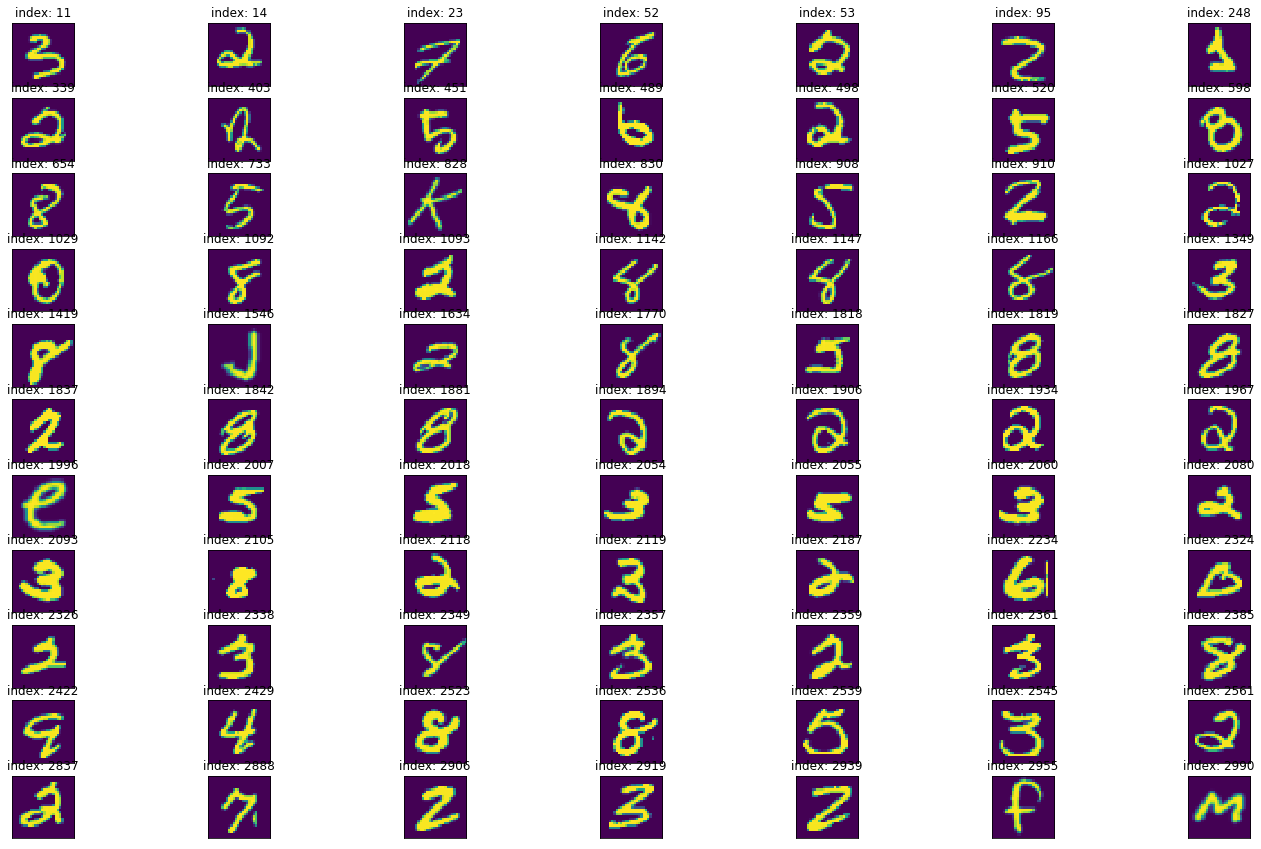

In [67]:
x_cs109b_images = x_cs109b[mse_x_cs109b.numpy() > u,:, :]
x_cs109b_img_idx = np.arange(0, x_cs109b.shape[0])[mse_x_cs109b.numpy() > u]
fig, ax = plt.subplots(11,7, figsize = (24, 15))
for i in range(x_cs109b_images.shape[0]):
    ax[i//7, i%7].imshow(x_cs109b_images[i,:,:])
    ax[i//7, i%7].set_title('index: {}'.format(x_cs109b_img_idx[i]))
    # remove xticks
    ax[i//7, i%7].set_xticks([], [])
    ax[i//7, i%7].set_yticks([], [])

In [71]:
# your code here
import pandas as pd
temp = pd.DataFrame({'index': [828, 2955, 2990, 1996, 1546], 'letter': ['k', 'f', 'm', 'e', 'J']})
result = temp.sort_values('index', ascending = True)
display(result)

,index,letter
0,828,k
4,1546,J
3,1996,e
1,2955,f
2,2990,m


*Your answer here*